In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import altair as alt
alt.renderers.enable('notebook')
alt.themes.enable('opaque')

alt.data_transformers.disable_max_rows()
df_train = pd.read_csv('../data/result/oof.csv')

df_train.head()

,row_id,well_id,GR,label,pred_label
0,0,0,143.510000,0,0
1,1,0,112.790928,0,0
2,2,0,123.531856,0,0
3,3,0,111.692784,0,0
4,4,0,123.613712,0,0


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


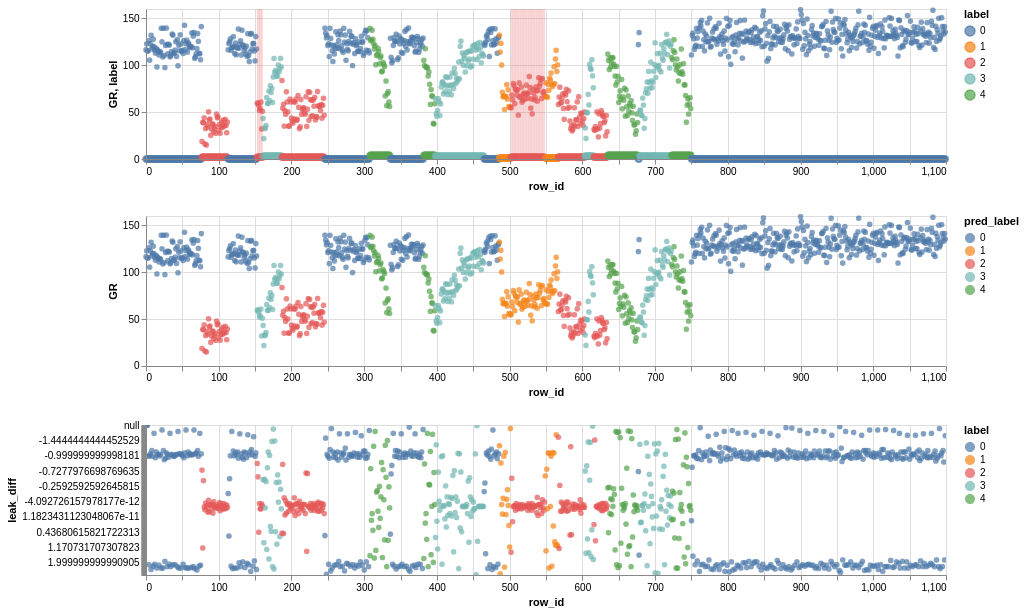

In [50]:
#well_ids = 14
well_ids = 3906
#well_ids = 50
df_sub = df_train[df_train['well_id'] == well_ids]
GR_leak = df_sub['GR'] * 100
GR_leak = GR_leak - np.floor(GR_leak)
df_rules = df_sub[df_sub['label']!=df_sub['pred_label']]
df_sub['leak'] = GR_leak
df_sub['leak_diff'] = GR_leak.diff().diff().diff()

cols = ['row_id','GR','label','pred_label','leak',"leak_diff"]
ch_rules = alt.Chart(data=df_rules).encode(x='row_id',color='label:N').mark_rule(opacity=0.2,size=1)
ch_gr = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='GR',order='row_id',color='label:N').mark_point(size=30,filled=True)
ch_lab = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='label',order='row_id',color='label:N').mark_point()
ch_grp = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='GR',order='row_id',color='pred_label:N').mark_point(size=30,filled=True)
ch_leak = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='leak_diff:O',order='row_id',color='label:N').mark_point(size=30,filled=True)

((ch_gr + ch_lab+ch_rules) & ch_grp & ch_leak.interactive()).resolve_scale(color='independent',y='independent')

425 0.9390909090909091
555 0.9590909090909091
836 0.9590909090909091
870 0.9581818181818181
933 0.9590909090909091
989 0.9590909090909091
1200 0.9445454545454546
1273 0.9418181818181818
1453 0.9563636363636364
2098 0.9527272727272728
3356 0.9545454545454546
3656 0.9563636363636364
3906 0.95
3987 0.9590909090909091


In [51]:
#well_ids = 14
def print_pic(well_id = 1200):
    df_sub = df_train[df_train['well_id'] == well_id]
    GR_leak = df_sub['GR'] * 100
    GR_leak = GR_leak - np.floor(GR_leak)
    df_rules = df_sub[df_sub['label']!=df_sub['pred_label']]
    df_sub['leak'] = GR_leak
    df_sub['leak_diff'] = GR_leak.diff().diff().diff()

    cols = ['row_id','GR','label','pred_label','leak',"leak_diff"]
    ch_rules = alt.Chart(data=df_rules).encode(x='row_id',color='label:N').mark_rule(opacity=0.2,size=1)
    ch_gr = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='GR',order='row_id',color='label:N').mark_point(size=30,filled=True)
    ch_lab = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='label',order='row_id',color='label:N').mark_point()
    ch_grp = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='GR',order='row_id',color='pred_label:N').mark_point(size=30,filled=True)
    ch_leak = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='leak_diff:O',order='row_id',color='label:N').mark_point(size=30,filled=True)

    ch_all = ((ch_gr + ch_lab+ch_rules) & ch_grp & ch_leak.interactive()).resolve_scale(color='independent',y='independent')
    ch_all.save(f'{well_id}.png')
print_pic()

/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
from sklearn.metrics import accuracy_score
scores = {}
for w in df_train['well_id'].unique():
    df_sub = df_train[df_train['well_id'] == w]
    score = accuracy_score(df_sub['label'],df_sub['pred_label'])
    scores[w] = score
    if score <0.96:
        print(w,score)
        print_pic(w)

425 0.9390909090909091


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


555 0.9590909090909091


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


836 0.9590909090909091


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


870 0.9581818181818181


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


933 0.9590909090909091


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


989 0.9590909090909091


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1200 0.9445454545454546


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1273 0.9418181818181818


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1453 0.9563636363636364


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2098 0.9527272727272728


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3356 0.9545454545454546


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3656 0.9563636363636364


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3906 0.95


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3987 0.9590909090909091


/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/geoanton/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


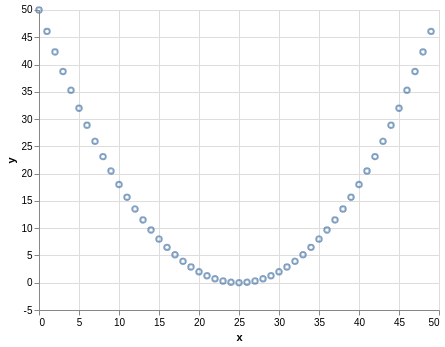

In [30]:
def make_parabolic(w,amp=50):
    x=[0,w/2,w]
    y=[amp,0,amp]
    p_coef = np.polyfit(x,y,2)
    p=np.poly1d(p_coef)
    x_new = np.arange(w)
    res = p(x_new)
    return res
    
y = make_parabolic(w=50)
tmp = pd.DataFrame({'y':y,'x':np.arange(y.shape[0])})
alt.Chart(tmp).encode(x='x',y='y').mark_point()